# Example of running MPSlib in Google Colab

## Install MPSlib (if not allready installed)


In [1]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
    exe_folder = ''
        
except ImportError:
    import sys
    is_colab = 'google.colab' in sys.modules
    print (is_colab)
    if is_colab:
        print('%s cannot be loaded. trying to install it.' % module_name)
        !pip install scikit-mps

        # Recompile from src on Colab
        import pathlib
        import mpslib as mps

        scikit_mps_path = pathlib.Path(mps.__file__).parent.absolute()
        src_path = pathlib.Path.home().joinpath(scikit_mps_path, 'bin')
        sh = 'cd %s\n./install_latest_mpslib.sh' % (src_path)
        with open('script.sh', 'w') as file:
          file.write(sh)

        !bash script.sh

    else:
        print('Please install MPSlib and scikit-mps from http://github.com/ergosimulation/mpslib/')
    


mpslib allready installed. skipping installation.


In [2]:
import mpslib as mps
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Select traning image

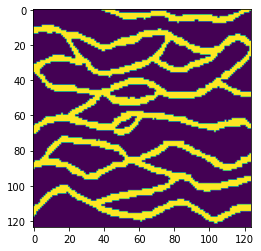

In [3]:

TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.checkerboard2()
#TI, TI_filename = mps.trainingimages.rot90()
plt.imshow(TI[:,:,0].T)
#mps.trainingimages.ti_plot_all()

## Setup MPSlib

In [4]:
O = mps.mpslib(method='mps_snesim_tree',verbose_level=-1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=100
O.par['n_cond']=36
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])

# TI
O.ti = TI

/mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib
Using mps_snesim_tree installed in /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/bin (scikit-mps in /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


## Run MPSlib

In [5]:
# Serial 
#O.run()
# Parallel
O.run_parallel()

parallel: using 52 threads to simulate 100 realizations
parallel: with up to 2 relizations per thread
parallel: Using 50 of max 52 threads
__name__ = mpslib.mpslib
Thread:000, nr=2Thread:001, nr=2
Thread:002, nr=2
Thread:003, nr=2

Thread:004, nr=2Thread:005, nr=2

Thread:006, nr=2Thread:007, nr=2
Thread:008, nr=2

Thread:009, nr=2Thread:010, nr=2

Thread:011, nr=2Thread:012, nr=2

Thread:013, nr=2
Thread:015, nr=2Thread:014, nr=2Thread:016, nr=2

Thread:017, nr=2
Thread:018, nr=2

Thread:019, nr=2Thread:020, nr=2Thread:021, nr=2


Thread:022, nr=2
Thread:023, nr=2Thread:024, nr=2
Thread:025, nr=2
Thread:026, nr=2
Thread:027, nr=2

Thread:028, nr=2
Thread:030, nr=2Thread:031, nr=2
Thread:032, nr=2
Thread:033, nr=2

Thread:034, nr=2
Thread:035, nr=2Thread:036, nr=2
Thread:037, nr=2
Thread:038, nr=2
Thread:039, nr=2
Thread:040, nr=2
Thread:041, nr=2Thread:042, nr=2


Thread:043, nr=2Thread:044, nr=2
Thread:045, nr=2
Thread:046, nr=2
Thread:047, nr=2

Thread:048, nr=2Thread:049, nr=2

Thr

## Plot realizations and E-types

In [1]:
O.plot_reals()
O.plot_etype()

NameError: name 'O' is not defined

In [7]:
O.par['do_entropy']=1
O.par['do_estimation']=1
O.par['n_real']=1
O.run()


loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


True